# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
from typing import List, Dict, Tuple

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

1. Follow the pseudocode in the book exactly.
2. Learn about the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem).


These links are to help me navigate your notebook:

1. [Four Color Connecticut](#four_ct)
2. [Three Color Connecticut](#three_ct)
3. [Four Color Europe](#four_eu)
4. [Three Color Europe](#three_eu)


## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using at most four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140),
                 (104, 77), (197, 94), (123, 142)],
    'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4),
           (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
print(connecticut)

{'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140), (104, 77), (197, 94), (123, 142)], 'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4), (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)], 'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland', 'New Haven', 'New London', 'Hartford']}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>Do not use NetworkX nodes as the data structure for your assignment.
    We are only using it to color the maps.
    Use basic Python data structures as specified in the general programming requirements.</p>
</div>


In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

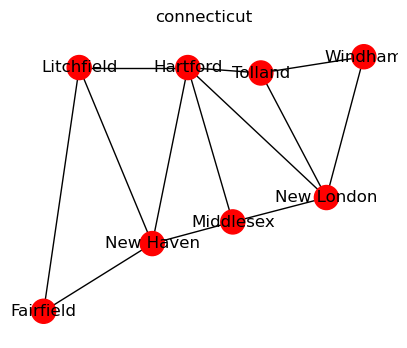

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. Look at the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You *must* implement **Degree Heuristic** (to pick variables) and **Least Constraining Value** (to pick values).
You *may* implement **Minimum Remaining Values** as a tie breaker, if you like.
Otherwise, break ties in ascending order (least to most).
(Which functions in the pseudocode represent the heuristics?).

You should get the backtracking and forward checking implemented first. 
Then add the heuristics. 
You must use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. 
When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

```
Required:
    backtracking: yes
    forward checking: yes
    degree heuristic: yes
    least contraining value: yes
Optional:    
    minimum remaining values: no
```  

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`.

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement):

1. The variable selected and why.
2. The values proposed in order.
3. backtracking detected by forward checking (empty domains).

Don't print out a lot of noise.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

<a id="is_complete"></a>
## is_complete

`is_complete` checks whether the given `assignment` is complete. By definition, an assignment is complete if all variables have been assigned values. A solution is correct if the assignment provided is both *complete* and *consistent* - the second check occurs within the body of `backtrack`. **Used by**: [backtrack](#backtrack)

* **assignment**: the list of node,color assignments to check

**returns** `bool`: a boolean check on whether `assignment` is complete.

In [5]:
def is_complete(assignment) -> bool:
    check = all(color != None for (node, color) in assignment)
    return deepcopy(assignment), (bool(assignment) and check)

In [6]:
# assertions/unit tests
assignment = [(0, "red"), (1, "blue"), (2, "yellow"), (3, "green")]
actual_complete, check = is_complete(assignment)
assert check
assignment = []
actual_complete, check = is_complete(assignment)
assert not check
assignment = [(0, None), (1, "red"), (2, None)]
actual_complete, check = is_complete(assignment)
assert not check

<a id="select_unassigned_var"></a>
## select_unassigned_var

`select_unassigned_var` implements the Degree Heuristic to choose the next variable to assign a value in the `color_map` algorithm. The Degree Heuristic considers all unassigned variables and chooses the one that has the most constraints to other unassigned variables. By picking the one with the most constraints, we can start our recursion with the most possible options and allow for forward checking to eliminate the most possibilities. The algorithm uses the current `csp` and `assignment` to determine which variables are left to be assigned, as well as the edges between nodes. If all nodes have zero degree, the first unassigned index is returned. **Used by**: [backtrack](#backtrack)

* **csp**: the state of the map as a list of edges and domains for each node
* **assignment**: the list of node,color assignments to choose variables from
* **trace**: an optional parameter to print debug/tracing statements

**returns** `Tuple[str, int]`: a tuple of the node name and index to assign a value to

In [7]:
def select_unassigned_var(csp, assignment, trace) -> Tuple[str, int]:
    unassigned_idxs = [i for i, elem in enumerate(assignment) if elem[1] == None]
    assigned_idxs = [i for i, elem in enumerate(assignment) if elem[1] != None]
    degrees = [[] for i in range(len(assignment))]
    for unassigned_idx in unassigned_idxs:
        degrees[unassigned_idx] = [edge for edge in csp[0][unassigned_idx] if edge not in assigned_idxs]
    max_degree = max(degrees, key = lambda i: len(i))
    idx = unassigned_idxs[0] if not max_degree else degrees.index(max_degree)
    if trace: print("Chosen value:", assignment[idx][0])
    return deepcopy(assignment[idx][0]), idx

In [8]:
# assertions/unit tests
csp = [[{2, 5}, {4, 6}, {0, 5, 7}, {5, 6, 7}, {1, 6, 7}, {0, 2, 3, 7}, {1, 3, 4, 7}, {2, 3, 4, 5, 6}], 
       [['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow']]]

assignment = [('Fairfield', None), ('Windham', 'blue'), ('Litchfield', None), 
              ('Middlesex', 'green'), ('Tolland', None), ('New Haven', None), 
              ('New London', None), ('Hartford', 'yellow')]
var, idx = select_unassigned_var(csp, assignment, False)
assert var == "Fairfield"

assignment = [('Fairfield', 'red'), ('Windham', 'blue'), ('Litchfield', 'red'), 
              ('Middlesex', 'green'), ('Tolland', 'red'), ('New Haven', 'red'), 
              ('New London', None), ('Hartford', 'yellow')]
var, idx = select_unassigned_var(csp, assignment, False)
assert var == 'New London'

assignment = [('Fairfield', None), ('Windham', None), ('Litchfield', None), 
              ('Middlesex', None), ('Tolland', None), ('New Haven', None), 
              ('New London', None), ('Hartford', None)]
var, idx = select_unassigned_var(csp, assignment, False)
assert var == 'Hartford'

<a id="order_domain_vals"></a>
## order_domain_vals

`order_domain_vals` uses the Least Constraining Value heuristic to choose the order in which to assign values to the given variable. The function takes the current state of the map as `csp`, the current `assignment` list, the index of the variable to be assigned (`idx`), and `trace` for debugging. The Least Constraining Value heuristic orders the values in the domain of the variable by those that have the least overlap within the constraints of `csp`. By sorting this way, we can ensure that future choices are more likely to succeed and less likely to lead to backtracking. **Used by**: [backtrack](#backtrack)

* **csp**: the state of the map as a list of edges and domains for each node
* **idx**: the index in `assignment` of the variable to be assigned a value
* **assignment**: the list of node,color assignments
* **trace**: an optional parameter to print debug/tracing statements

**returns**: `List`: a list of values ordered by least constrained to most constrained

In [9]:
def order_domain_vals(csp, idx, assignment, trace) -> List:
    domain = deepcopy(csp[1][idx])
    constraints = {color: 0 for color in domain}
    for color in domain:
        count = 0
        for edge in csp[0][idx]:
            count += 1 if color in csp[1][edge] else 0
        constraints[color] = count
    constraints = sorted(constraints, key = lambda i: i[1])
    if trace: print("Values in order for ", assignment[idx][0], ":", constraints)
    return constraints

In [10]:
# assertions/unit tests
csp = [[{2, 5}, {4, 6}, {0, 5, 7}, {5, 6, 7}, {1, 6, 7}, {0, 2, 3, 7}, {1, 3, 4, 7}, {2, 3, 4, 5, 6}], 
       [['red', 'green', 'yellow'], ['red', 'blue'], ['red', 'green'], 
         ['red', 'blue', 'green'], ['red', 'blue', 'green', 'yellow'], ['blue', 'green', 'yellow'], 
         ['green', 'yellow'], ['red', 'blue', 'green', 'yellow']]]

assignment = [('Fairfield', None), ('Windham', 'blue'), ('Litchfield', None), 
              ('Middlesex', 'green'), ('Tolland', None), ('New Haven', None), 
              ('New London', None), ('Hartford', 'yellow')]
vals = order_domain_vals(csp, 0, assignment, False)
assert vals == ['red', 'yellow', 'green']
vals = order_domain_vals(csp, 3, assignment, False)
assert vals == ['red', 'blue', 'green']
vals = order_domain_vals(csp, 7, assignment, False)
assert vals == ['red', 'yellow', 'blue', 'green']

<a id="inference"></a>
## inference

`inference` generates "inferences", which are new domains from forward checking after assigning a value to the node at `idx` in `assignment`. `inference` takes the current map state as `csp`, along with the two parameters `idx` and `assignment` and eliminates the `added_val` from the domains of nodes constrained by the node at `idx`. By implementing forward checking, we can avoid traversing extra steps in our search, thus saving time and space. Forward checking removes any assigned values from constrained domains - if any domain is emptied after this operation, we return `True` for `empty_check`, and this notifies `backtrack` to instantly backtrack. **Used by**: [backtrack](#backtrack)

* **csp**: the state of the map as a list of edges and domains
* **idx**: the index of the node that was most recently assigned a value
* **assignment**: the list of node,color assignments
* **trace**: an optional parameter to print debug/tracing statements

**returns**: `Tuple[List, bool]`: a tuple of the new domains after forward checking and a boolean for whether any domains are empty.

In [11]:
def inference(csp, idx, assignment, trace) -> Tuple[List, bool]:
    added_val = assignment[idx][1]
    new_domains = deepcopy(csp[1])
    for adj_node in csp[0][idx]:
        if added_val in new_domains[adj_node]:
            if trace: print("Removed", added_val, "from", assignment[adj_node])
            new_domains[adj_node].remove(added_val)
    empty_check = not (all(domain for domain in new_domains))
    if trace: 
        if empty_check: print("Backtracking due to empty domain of ", assignment[adj_node])
        print("New domains:", new_domains)
    return new_domains, empty_check

In [12]:
# assertions/unit tests
csp = [[{2, 5}, {4, 6}, {0, 5, 7}, {5, 6, 7}, {1, 6, 7}, {0, 2, 3, 7}, {1, 3, 4, 7}, {2, 3, 4, 5, 6}], 
       [['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow']]]
assignment = [('Fairfield', 'red'), ('Windham', None), ('Litchfield', None), 
              ('Middlesex', None), ('Tolland', None), ('New Haven', None), 
              ('New London', None), ('Hartford', None)]
new_domains, empty_check = inference(csp, 0, assignment, False)
assert not empty_check
assert new_domains[2] == new_domains[5] == ['blue', 'green', 'yellow']
assert new_domains[0] == new_domains[7] == ['red', 'blue', 'green', 'yellow']

<a id="add_inferences"></a>
## add_inferences

`add_inferences` takes inferences generated by `inference` and assigns them to a deepcopy of `csp`'s domains list. Doing this allows us to continue our search with a record of what our previous state was before we assumed the new domains from `inference`. **Used by**: [backtrack](#backtrack)

* **csp**: the state of the map as a list of edges and domains
* **inferences**: the new list of domains generated from `inference`

**returns**: `List[List]`: a new copy of `csp` with `inferences` as the domains

In [13]:
def add_inferences(csp, inferences) -> List[List]:
    new_csp = deepcopy(csp)
    new_csp[1] = inferences
    return new_csp

In [14]:
# assertions/unit tests
csp = [[{2, 5}, {4, 6}, {0, 5, 7}, {5, 6, 7}, {1, 6, 7}, {0, 2, 3, 7}, {1, 3, 4, 7}, {2, 3, 4, 5, 6}], 
       [['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow'], 
        ['red', 'blue', 'green', 'yellow'], ['red', 'blue', 'green', 'yellow']]]

inferences = [['red', 'green', 'yellow'], 
              ['red'], 
              ['red', 'green'], 
              ['red', 'blue'], 
              ['red', 'blue', 'green', 'yellow'], 
              ['blue', 'green', 'yellow'], 
              ['green', 'yellow'], 
              ['red', 'blue', 'green', 'yellow']]
initial_colors = csp[1]
new_csp = add_inferences(csp, inferences)
assert new_csp[1] != initial_colors
assert new_csp[1] == inferences
assert csp[1] == initial_colors

<a id="construct_csp"></a>
## construct_csp

`construct_csp` is a helper function that transforms the `planar_map` into a state form, `csp`. The function creates a list of edges for each node - the index in `edge_list` identifies which node has the edges, and the elements in the sublist identify which nodes are adjacent to the index node. The domain list is a list of all possible values for each node, and is laid out similarly (the index of the sublist identifies which node has the given domain of the sublist). All nodes start with the full domain specified by `color_list`. **Used by**: [color_map](#color_map)

* **planar_map**: a dictionary of node names, edge pairs, and coordinates for our map
* **color_list**: a list of all possible colors to be used in coloring the map

**returns** `List[List]`: a state form of our map as a list of edges and domains

In [15]:
def construct_csp(planar_map, color_list) -> List[List]:
    num_nodes = len(planar_map["nodes"])
    edge_list = [set() for i in range(num_nodes)]
    domain_list = [deepcopy(color_list) for i in range(num_nodes)]
    for (edge_start, edge_end) in planar_map["edges"]:
        edge_list[edge_end].add(edge_start)
        edge_list[edge_start].add(edge_end)
    return [edge_list, domain_list]

In [16]:
# assertions/unit tests
edge_list, domain_list = construct_csp(connecticut, ["red", "blue", "green", "yellow"])
assert edge_list[0] == {2, 5} and domain_list[0] == ["red", "blue", "green", "yellow"]
assert edge_list[3] == {5, 6, 7}
assert edge_list[6] == {1, 3, 4, 7}

<a id="backtrack"></a>
## backtrack

`backtrack` is the main actor in our `color_map` algorithm - it is an augmented depth-first-search with backtracking and forward checking. The function takes a state form representation of the map to be colored and explores how to color the map such that no two adjacent nodes are the same color. The function starts with a "full" state, where every node has a full domain, and an empty list of assignments (all nodes have `None` as their color). The function guarantees that any returned `assignment` is either complete and consistent (a solution), or a failure state. The completeness is checked by `is_complete` and the consistency is checked by line 7 (checking whether a value can be assigned in the constraints of the problem). 

The heuristics of assignment and value are labeled on lines 5 and 6 - we are using the Degree heuristic for variables and the Least Constrained Value heuristic for values (see `select_unassigned_var` and `order_domain_vals` for more information). The function also has a `trace` parameter and various debug statements throughout. All pseudocode is adapted from "Artificial Intelligence: A Modern Approach, 4th Edition". **Uses**: [is_complete](#is_complete), [select_unassigned_var](#select_unassigned_var), [order_domain_vals](#order_domain_vals), [inference](#inference), [add_inferences](#add_inferences), [backtrack](#backtrack). **Used by**: [color_map](#color_map)

* **csp**: the state of the map as a list of edges and domains
* **assignment**: the list of node,color assignments
* **trace**: an optional parameter to print debug/tracing statements

**returns**: `Tuple[List[List], bool]`: a tuple of the assignment and a boolean on whether the function failed (True) or not (False).

In [17]:
def backtrack(csp, assignment, trace) -> Tuple[List[Tuple], bool]:
    if trace: print(assignment)
    assignment, complete_check = is_complete(assignment)
    if complete_check: return assignment, False
    var, idx = select_unassigned_var(csp, assignment, trace) # assignment heuristic
    for value in order_domain_vals(csp, idx, assignment, trace): # value heuristic
        if value in csp[1][idx]:
            assignment[idx] = (var, value)
            if trace: print("Currently testing value", value)
            inferences, empty_domains = inference(csp, idx, assignment, trace)
            if not empty_domains:
                if trace: print("Inferring for value", value)
                new_csp = add_inferences(csp, inferences)
                assignment, failed_backtrack = backtrack(new_csp, deepcopy(assignment), trace)
                if not failed_backtrack: return assignment, False
            assignment[idx] = (var, None)
    return assignment, True

<a id="color_map"></a>
## color_map

`color_map` is the called function for coloring our map using depth-first-search and backtracking/forward checking. It utilizes the `backtrack` function to do most of the work. The only operations done here are initializing `csp` using `construct_csp`, initializing `assignment` as a list of nodes mapped to `None`, and returning `None` if the `backtrack` algorithm fails (and returning the assignment otherwise). **Uses**: [construct_csp](#construct_csp), [backtrack](#backtrack).

* **planar_map**: the dictionary representation of our map to be colored
* **color_list**: a list of colors that we can choose from in coloring our map
* **trace**: an optional parameter to print debug/tracing statements

**returns**: `None` or `List[Tuple]`: `assignment` if `backtrack` succeeds, or `None` if it fails.

In [18]:
def color_map(planar_map, color_list, trace=False):
    csp = construct_csp(planar_map, color_list)
    assignment = [(node, None) for node in planar_map["nodes"]]
    assignment, failure = backtrack(csp, assignment, trace)    
    return None if failure else assignment

Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Problem 1. Color Connecticut Using Your Solution

In [19]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=False)

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

<a id="four_ct"></a>
#### Test Cases

In [20]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

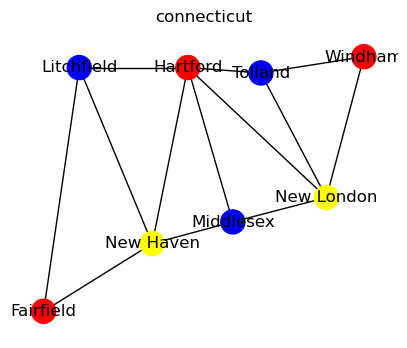

In [21]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

<a id="three_ct"></a>
## Does the Four Color Theorem apply here?

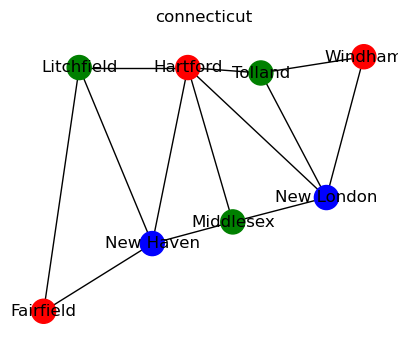

In [22]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=False)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [23]:
europe = {
    'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57),
                 (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32),
                 (94, 97), (143, 149), (140, 111), (110, 67), (127, 40),
                 (118, 47), (111, 54), (189, 39), (202, 33), (82, 74),
                 (110, 162), (137, 102), (93, 55), (125, 32), (128, 37),
                 (122, 42), (116, 53), (124, 65), (146, 87), (138, 54),
                 (137, 41), (64, 90), (130, 22), (168, 29), (78, 55),
                 (116, 144), (122, 57), (158, 65), (122, 78), (112, 60),
                 (127, 48), (191, 118), (100, 78), (102, 35)],
 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22),
           (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24),
           (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12),
           (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37),
           (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23),
           (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30),
           (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 39),
           (15, 41), (15, 29), (41, 4), (41, 24), (41, 45), (41, 18), (41, 38),
           (41, 29), (4, 24), (24, 45), (45, 1), (45, 34), (45, 25), (45, 27),
           (45, 17), (45, 28), (45, 18), (34, 25), (34, 26), (34, 32), (34, 6),
           (34, 35), (25, 26), (25, 16), (25, 27), (26, 16), (26, 42), (26, 32),
           (16, 27), (16, 42), (27, 17), (27, 42), (17, 42), (17, 28), (42, 28),
           (42, 38), (42, 31), (42, 32), (28, 18), (28, 38), (18, 38), (38, 29),
           (38, 39), (38, 31), (29, 39), (30, 39), (30, 43), (39, 5), (39, 31),
           (39, 43), (5, 31), (31, 32), (32, 35), (6, 35), (35, 19), (35, 11),
           (35, 20), (19, 11), (19, 20), (19, 43), (11, 20), (20, 43)],
 'nodes': ['Portugal', 'Malta', 'Iceland', 'Ireland', 'Liechtenstein',
           'Moldova', 'Cyprus', 'Spain', 'Netherlands', 'Luxembourg',
           'Lithuania', 'Armenia', 'Denmark', 'Finland', 'Estonia',
           'Czech Republic', 'Kosovo', 'Bosnia Herzegovina', 'Slovenia',
           'Georgia', 'Azerbaijan', 'Belgium', 'Norway', 'Latvia',
           'Switzerland', 'Albania', 'Macedonia', 'Montenegro', 'Croatia',
           'Slovakia', 'Belarus', 'Romania', 'Bulgaria', 'United Kingdom',
           'Greece', 'Turkey', 'France', 'Sweden', 'Hungary', 'Ukraine',
           'Poland', 'Austria', 'Serbia', 'Russia', 'Germany', 'Italy']}
print(europe)

{'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57), (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32), (94, 97), (143, 149), (140, 111), (110, 67), (127, 40), (118, 47), (111, 54), (189, 39), (202, 33), (82, 74), (110, 162), (137, 102), (93, 55), (125, 32), (128, 37), (122, 42), (116, 53), (124, 65), (146, 87), (138, 54), (137, 41), (64, 90), (130, 22), (168, 29), (78, 55), (116, 144), (122, 57), (158, 65), (122, 78), (112, 60), (127, 48), (191, 118), (100, 78), (102, 35)], 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22), (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24), (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12), (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37), (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23), (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30), (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 

In [24]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=False)

Here we're testing to see if the adjacent nodes are colored differently:

<a id="four_eu"></a>
#### Test Cases

In [25]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

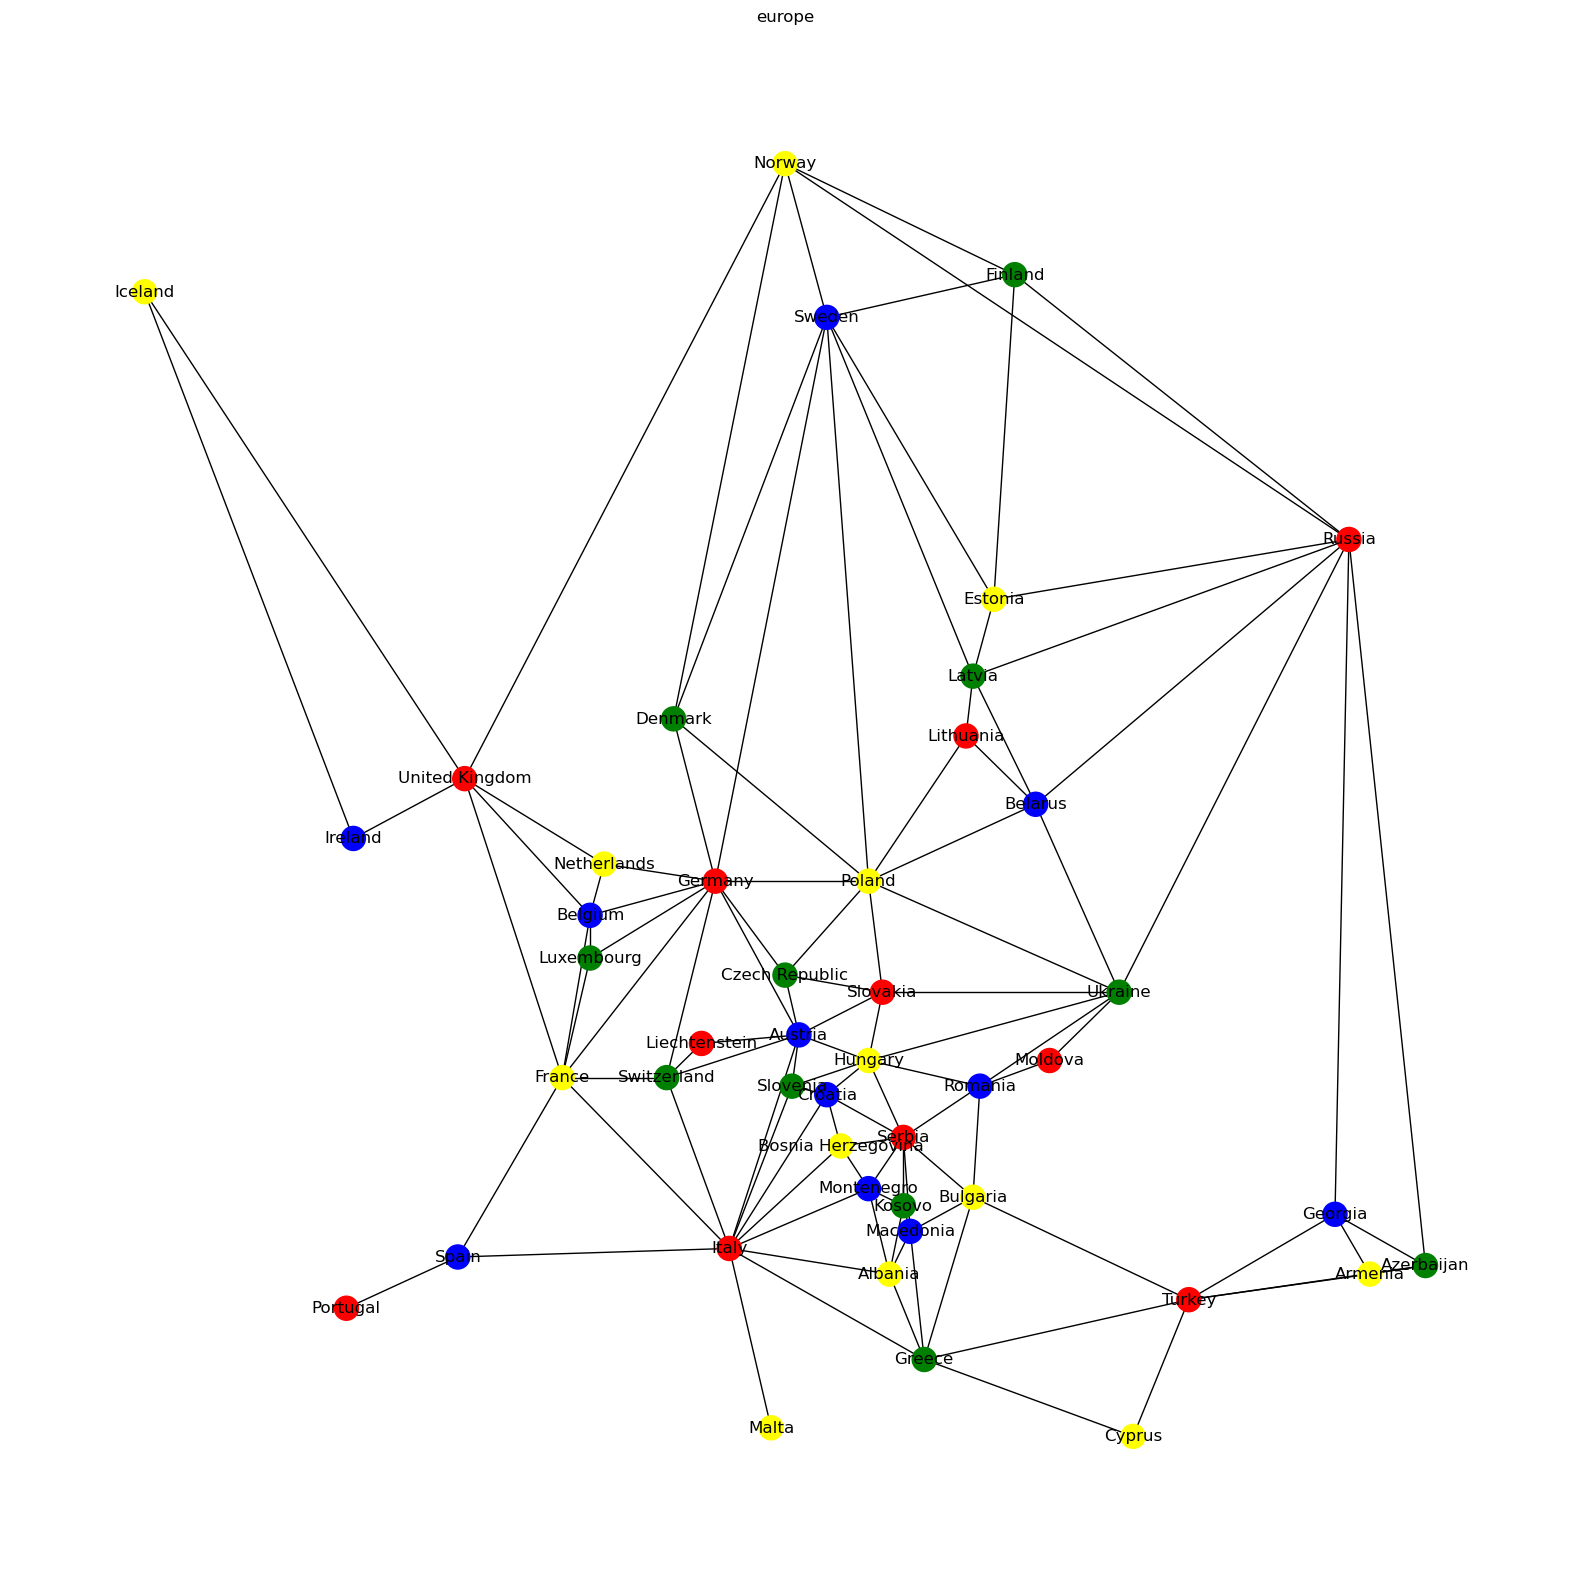

In [26]:
draw_map("europe", europe, (20,20), europe_colors)

<a id="three_eu"></a>
## Does the Four Color Theorem apply here?

In [27]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=False)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.